In [41]:
import dask.array as da

In [77]:
import numpy as np

In [108]:
tmp = np.array([[a,a,a,a] for a in range(10)]).tolist()

In [103]:
from fst.io import access

In [105]:
rawGroup = access('/nrs/cosem/davis/LoadID365_ROI4_8x8x8nm/LoadID365_ROI4_8x8x8nm.n5/volumes/raw/', mode='a')

In [122]:
da.take(data, 0, axis=0)

dask.array<getitem, shape=(10, 10), dtype=float64, chunksize=(10, 10), chunktype=numpy.ndarray>

In [91]:
data = da.zeros((10,10,10), chunks=(1,10,10))
pw = ((0,0),(0,1),(0,2))
padded = data.map_blocks(np.pad, pad_width=pw, 
                mode='constant', 
                constant_values=data.min(), 
                chunks=tuple(c + p[1] - p[0] for c,p in zip(data.chunksize, pw)))


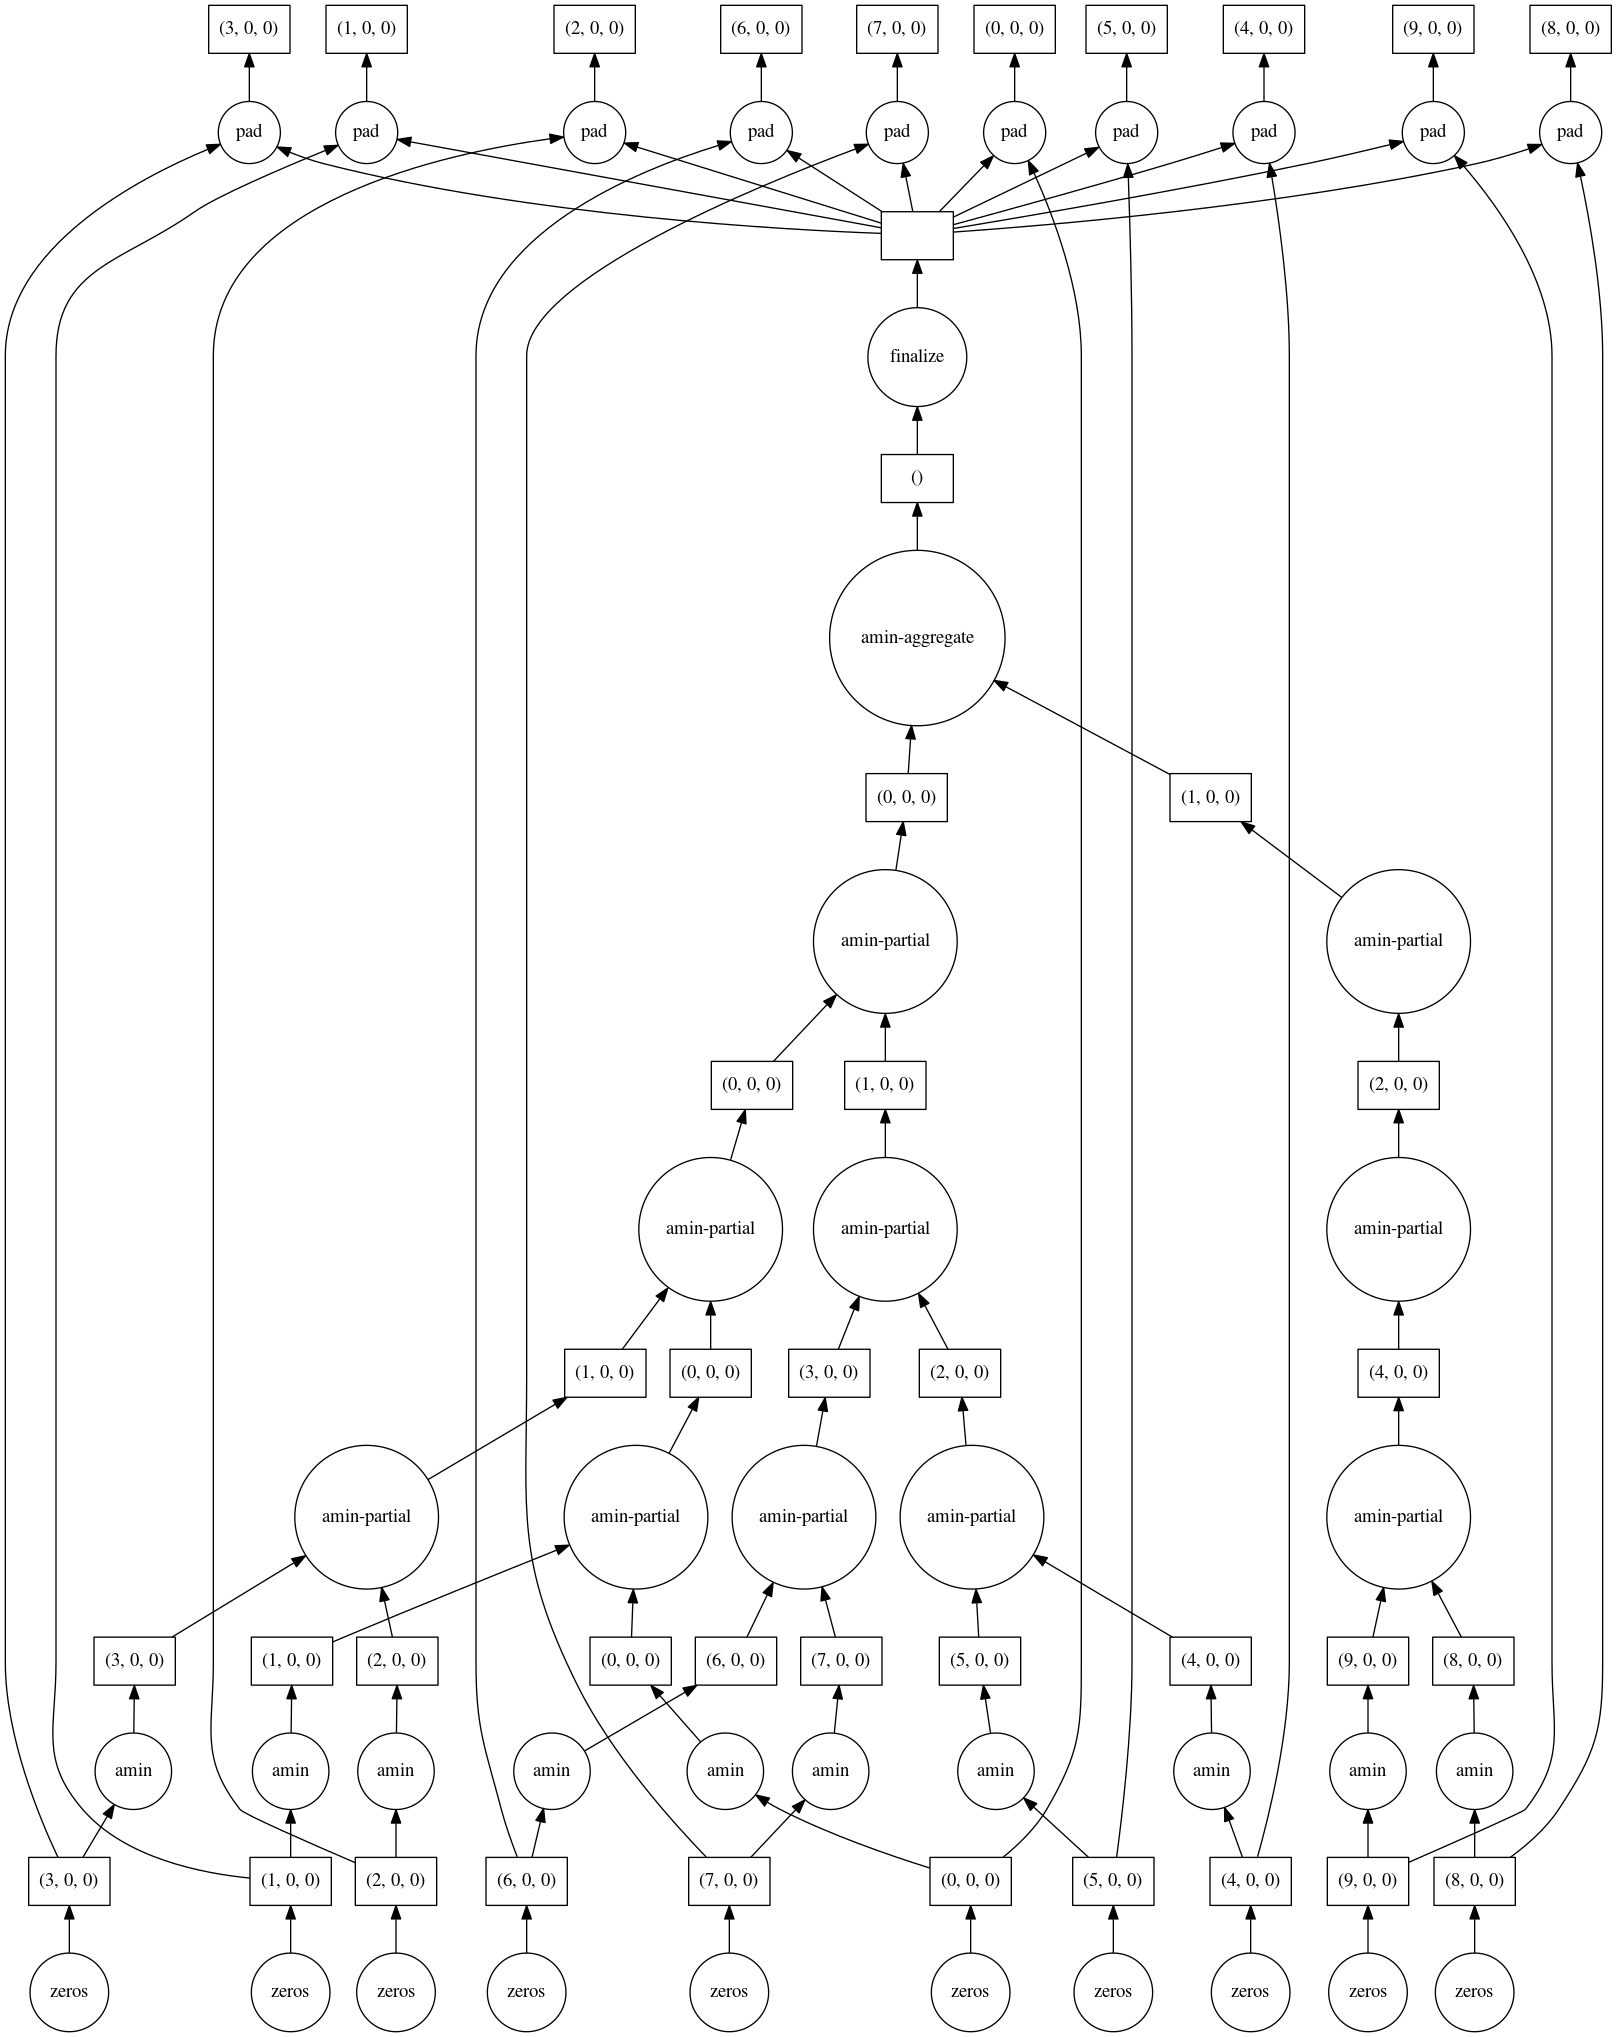

In [93]:
padded.visualize()

In [76]:
da.pad(da.zeros((10, 10, 10)), ((0,0), (0,1), (0,1)), stat_length=(10,10,10), mode='minimum')

TypeError: `pad_value` must be composed of integral typed values.

In [ ]:
from glob import glob
from fst.io import read
from pathlib import Path
fnames = sorted(glob('/groups/cosem/cosem/data/*/*.n5'))

In [40]:
!ls /groups/cosem/cosem/data/hela_4/hela_4.n5/volumes/raw/ch0

attributes.json  s0  s1  s2  s3  s4  s5


In [18]:
roots = {str(Path(f).parts[-1]): read(f + '/volumes/raw') for f in fnames}

In [35]:
tuple(roots.keys())

('COS7_Cell11_8x8x8nm_raw.n5',
 'Cryo_LoadID277_Cell11_8x8x8nm_bigwarped_v17.n5',
 'Chlamydomonas_4x4x4nm.n5',
 'Chlamydomonas_4x4x4nm_raw.n5',
 'Choroid-Plexus_4x4x4nm_raw.n5',
 'FS163v2_Cell2.n5',
 'FlyBrain_VNC_Sec16_4x4x4nm_raw.n5',
 'HeLa_Cell1_8x8x8nm_raw.n5',
 'HeLa_Cell1_D05-10_8x8x8nm.n5',
 'HeLa_Cell21_8x8x8nm.n5',
 'HeLa_Cell21_8x8x8nm_raw.n5',
 'HeLa_Cell25_flat_8x8x8nm.n5',
 'HeLa_Cell25_flat_8x8x8nm_raw.n5',
 'HeLa_Cell2_4x4x4nm.n5',
 'HeLa_Cell2_4x4x4nm_raw.n5',
 'test2.n5',
 'HeLa_Cell3_4x4x4nm.n5',
 'HeLa_Cell3_4x4x4nm_raw.n5',
 'Jurkat_Cell1_FS96-Area1_4x4x4nm.n5',
 'Jurkat_Cell1_FS96-Area1_4x4x4nm_raw.n5',
 'LoadID365_ROI4_8x8x8nm.n5',
 'LoadID365_ROI6_8x8x8nm.n5',
 'ctl_id8_1.n5',
 'Cryo_FS80_Cell2_4x4x4nm.n5',
 'Macrophage_FS80_Cell2_4x4x4nm_raw.n5',
 'Mouse_NA3-3_4x4x4nm.n5',
 'Mouse_NA3-3_4x4x4nm_raw.n5',
 'Pancreas_G36-2_4x4x4nm.n5',
 'Pancreas_G36-2_4x4x4nm_raw.n5',
 'Cryo_20171009_WT45_Cell2_4x4x4nm.n5',
 'TWalther_WT45_Cell2_4x4x4nm_raw.n5',
 'Cryo_LoadID252_

In [33]:
list(roots['HeLa_Cell2_4x4x4nm.n5'].attrs.items())

[('contrastAdjustment', {'max': 207.0, 'min': 89.0}),
 ('downsamplingFactors', [1.0, 1.0, 1.0]),
 ('name', 'Aubrey_17-7_17_Cell2_4x4x4nm'),
 ('pixelResolution', {'dimensions': [4, 4, 4], 'unit': 'nm'})]

In [30]:
{k:tuple(v.attrs) for k,v in roots.items()}

{'COS7_Cell11_8x8x8nm_raw.n5': (),
 'Cryo_LoadID277_Cell11_8x8x8nm_bigwarped_v17.n5': ('name', 'pixelResolution'),
 'Chlamydomonas_4x4x4nm.n5': ('name', 'pixelResolution'),
 'Chlamydomonas_4x4x4nm_raw.n5': (),
 'Choroid-Plexus_4x4x4nm_raw.n5': (),
 'FS163v2_Cell2.n5': (),
 'FlyBrain_VNC_Sec16_4x4x4nm_raw.n5': (),
 'HeLa_Cell1_8x8x8nm_raw.n5': (),
 'HeLa_Cell1_D05-10_8x8x8nm.n5': ('name', 'pixelResolution'),
 'HeLa_Cell21_8x8x8nm.n5': ('contrastAdjustment', 'name', 'pixelResolution'),
 'HeLa_Cell21_8x8x8nm_raw.n5': (),
 'HeLa_Cell25_flat_8x8x8nm.n5': ('name', 'pixelResolution'),
 'HeLa_Cell25_flat_8x8x8nm_raw.n5': (),
 'HeLa_Cell2_4x4x4nm.n5': ('contrastAdjustment',
  'downsamplingFactors',
  'name',
  'pixelResolution'),
 'HeLa_Cell2_4x4x4nm_raw.n5': (),
 'test2.n5': ('offset', 'resolution'),
 'HeLa_Cell3_4x4x4nm.n5': ('contrastAdjustment', 'name', 'pixelResolution'),
 'HeLa_Cell3_4x4x4nm_raw.n5': (),
 'Jurkat_Cell1_FS96-Area1_4x4x4nm.n5': ('contrastAdjustment',
  'name',
  'pixelResol